In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('IRIS_2.csv')

In [3]:
#from sklearn import datasets
#iris = datasets.load_iris()

In [4]:
#df = iris
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
133,6.3,2.8,5.1,1.5,Iris-virginica
67,5.8,2.7,4.1,1.0,Iris-versicolor
137,6.4,3.1,5.5,1.8,Iris-virginica
17,5.1,3.5,1.4,0.3,Iris-setosa
94,5.6,2.7,4.2,1.3,Iris-versicolor


<Axes: xlabel='species', ylabel='count'>

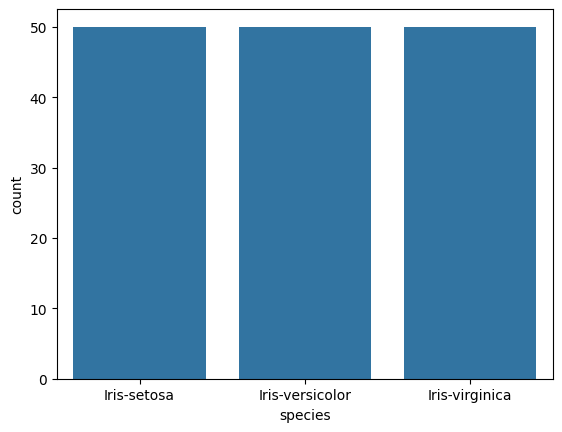

In [8]:
sns.countplot(x='species', data=df)

([<matplotlib.patches.Wedge at 0x7fa259643910>,
 [Text(0.5499999702695115, 0.9526279613277875, ''),
  Text(-1.0999999999999954, -1.0298943258065002e-07, ''),
  Text(0.5500001486524352, -0.9526278583383436, '')])

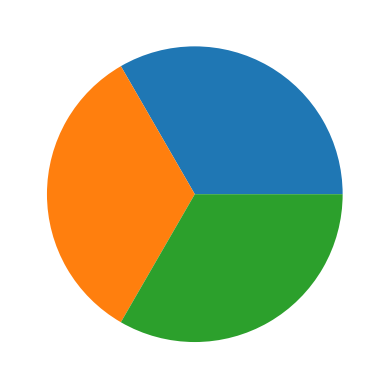

In [9]:
plt.pie(df['species'].value_counts())

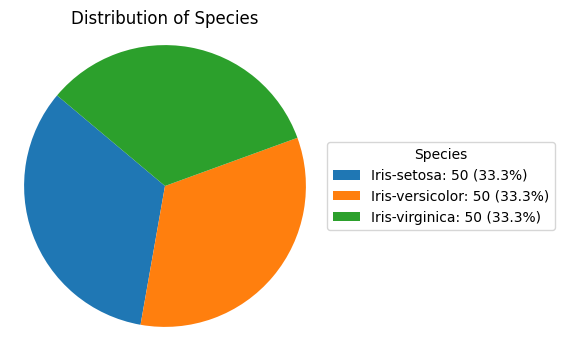

In [10]:
# Count the occurrences of each species
species_counts = df['species'].value_counts()

# Plot the pie chart
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts = ax.pie(species_counts, labels=None, autopct=None, startangle=140)

# Create legend labels with count and percentage
legend_labels = []
total_counts = species_counts.sum()
for i, species in enumerate(species_counts.index):
    count = species_counts[species]
    percentage = (count / total_counts) * 100
    legend_labels.append(f'{species}: {count} ({percentage:.1f}%)')

# Add the legend to the plot
ax.legend(wedges, legend_labels, title="Species", loc="center left", bbox_to_anchor=(1, 0.5))

# Set the title and ensure the pie chart is circular
plt.title('Distribution of Species')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

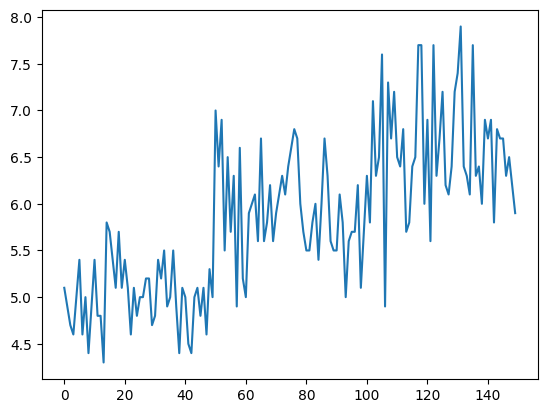

In [11]:
plt.plot(df['sepal_length'])
plt.show()

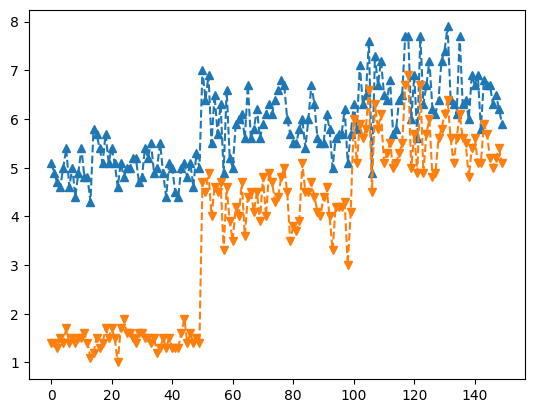

In [12]:
plt.plot(df['sepal_length'],'^--')
plt.plot(df['petal_length'],'v--')
plt.show()

<Axes: xlabel='petal_length', ylabel='species'>

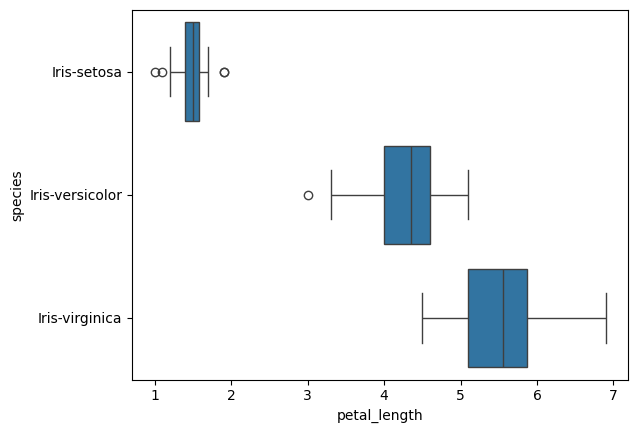

In [13]:
sns.boxplot(x='petal_length',y='species',data=df)

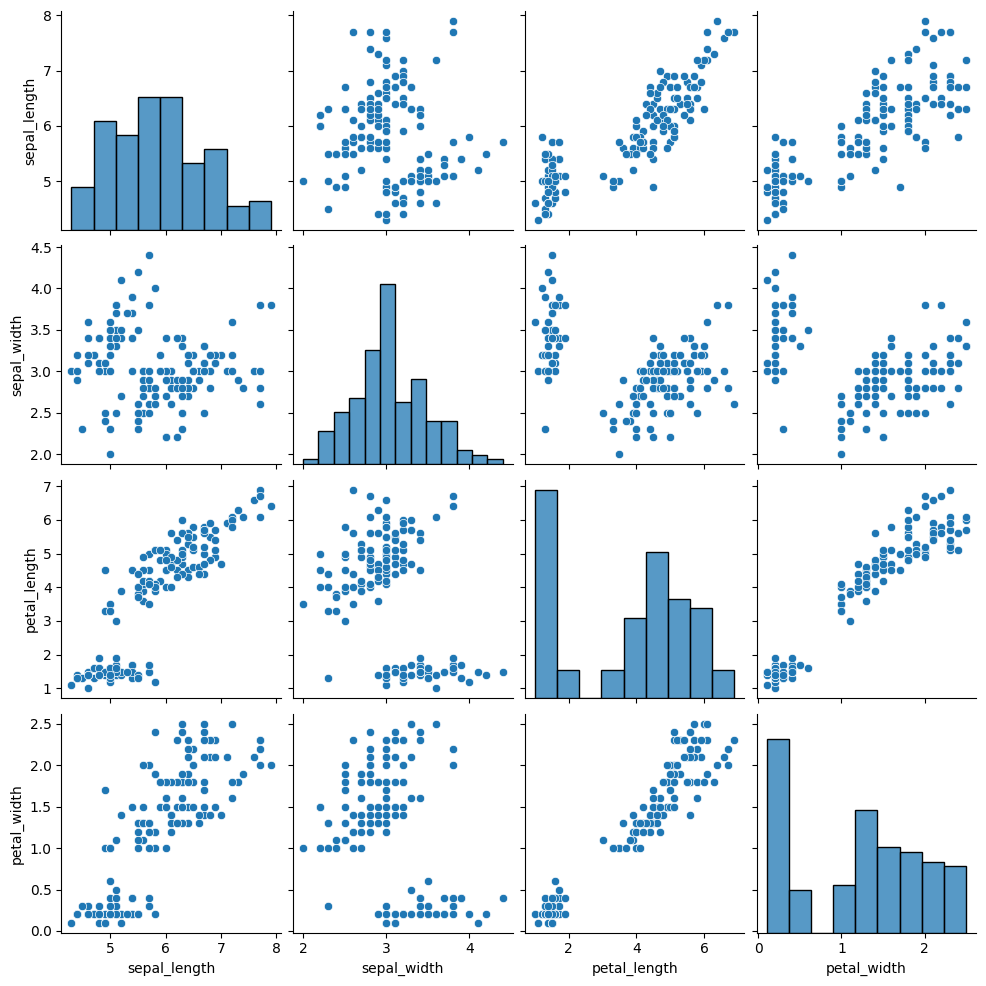

In [14]:
sns.pairplot(df)

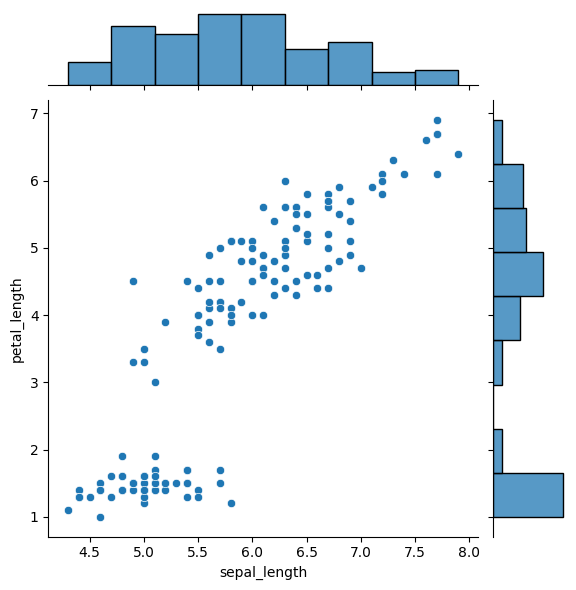

In [15]:
sns.jointplot(data=df, x='sepal_length', y='petal_length')

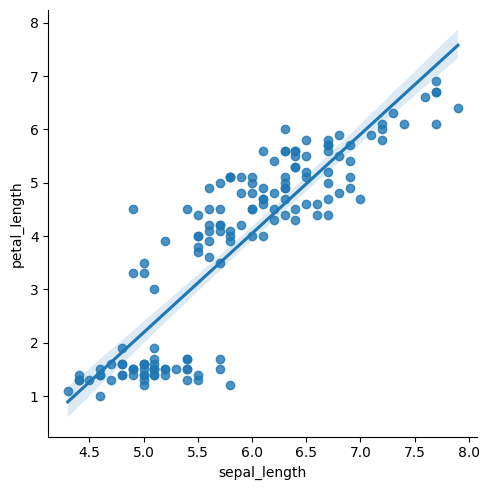

In [16]:
sns.lmplot(x='sepal_length', y='petal_length', data=df)

In [17]:
df = df.drop('species', axis=1)
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

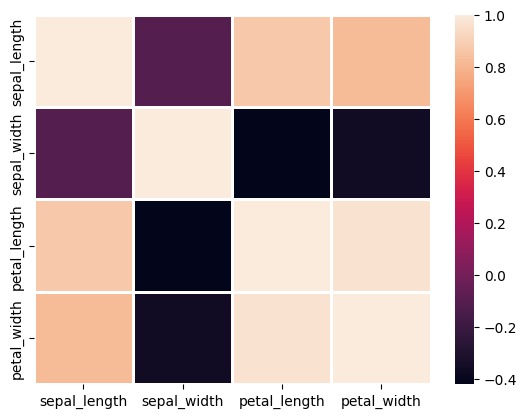

In [18]:
sns.heatmap(df.corr(),linecolor='white', linewidths=1)

In [19]:
X = df[['petal_width','sepal_width','sepal_length']]
#WRONG ==> X = df['petal_width','sepal_width','sepal_length']
#X = df.drop('species', axis=1)
y = df['petal_length']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)
lm.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Y Pred (Predicted Values)')

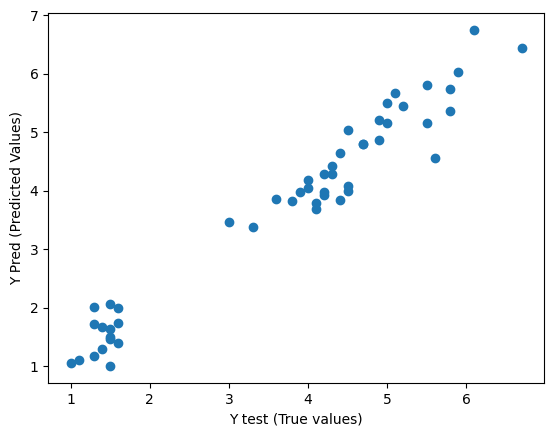

In [22]:
y_pred = lm.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Y test (True values)')
plt.ylabel('Y Pred (Predicted Values)')

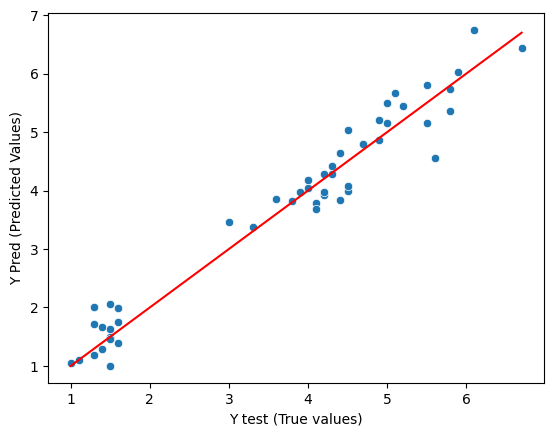

In [23]:
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test, color='red')  # This adds a line y=x, which is the ideal line of best fit if predictions were perfect

plt.xlabel('Y test (True values)')
plt.ylabel('Y Pred (Predicted Values)')
plt.show()